## Retail Sales Exploratory Data Analysis
This Jupyter Notebook provides an in-depth analysis of retail sales data. The dataset comprises of key attributes that will facilitate the exploration of sales trends, demographic impacts and purchasing behaviors. These attributes include:
 - Transaction ID
 - Date
 - Customer ID
 - Gender
 - Age
 - Product Category
 - Quantity
 - Price per Unit
 - Total Amount

In this notebook, I will provide an in-depth analysis of sales data while exploring these key areas
1. Age and gender influence on purchasing behavior
2. Sales across different time periods
3. Product categories with the highest appeal
4. Relationships between age, spending habits and product preference
5. Distribution of product prices within each category

Through this analysis, I aim to uncover insights that retailers could use to enhance their strategies and customer experiences.


## Loading Data

In [1]:
# Import relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
"""
Read a CSV file into a DataFrame using the read_csv function.
Specify the file path using a raw string (r"") to avoid escape character issues.
Use 'parse_dates' option to parse the 'Date' column as dates.
Set the 'Date' column as the index of the DataFrame using 'index_col'.
"""
df = pd.read_csv(r"C:\Users\admin\OneDrive\Desktop\Datasets\retail_sales_dataset.csv", parse_dates=['Date'], index_col='Date')

"""
Set a display option to control the formatting of floating-point numbers.
The lambda function takes a floating-point number 'x' and formats it to two decimal places.
"""
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [3]:
# Return the first 5 rows
df.head(5)

,Transaction ID,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
Date,,,,,,,,
2023-11-24,1,CUST001,Male,34,Beauty,3,50,150
2023-02-27,2,CUST002,Female,26,Clothing,2,500,1000
2023-01-13,3,CUST003,Male,50,Electronics,1,30,30
2023-05-21,4,CUST004,Male,37,Clothing,1,500,500
2023-05-06,5,CUST005,Male,30,Beauty,2,50,100


In [4]:
# Return the last 5 rows
df.tail(5)

,Transaction ID,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
Date,,,,,,,,
2023-05-16,996,CUST996,Male,62,Clothing,1,50,50
2023-11-17,997,CUST997,Male,52,Beauty,3,30,90
2023-10-29,998,CUST998,Female,23,Beauty,4,25,100
2023-12-05,999,CUST999,Female,36,Electronics,3,50,150
2023-04-12,1000,CUST1000,Male,47,Electronics,4,30,120


In [5]:
# Make a copy of the existing DataFrame df and assign it to a new variable 'retail_sales'
retail_sales = df.copy()

In [6]:
# Use 'info()' method to display a concise summary of the DataFrame
retail_sales.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1000 entries, 2023-11-24 to 2023-04-12
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Customer ID       1000 non-null   object
 2   Gender            1000 non-null   object
 3   Age               1000 non-null   int64 
 4   Product Category  1000 non-null   object
 5   Quantity          1000 non-null   int64 
 6   Price per Unit    1000 non-null   int64 
 7   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(3)
memory usage: 70.3+ KB


## Data Cleaning
Some of the issues we will investigate include:
1. Cheking for unique values in columns such as Gender and Product category
2. Creating new column Age buckets
3. Checking for irregularities within the dataset
4. Changing column names to lower case letters

### 1. Checking for unique values in Gender and Product Category columns

In [7]:
retail_sales[['Gender', 'Product Category']].nunique()

Gender              2
Product Category    3
dtype: int64

### 2. Creating new colunm 'Age_buckets'

In [8]:
# Generate descriptive statistics for 'Age' column to get the minimum and maximum age
retail_sales['Age'].describe()

# Define bins for age groups.
bins = [18, 30, 40, 50, 60, 70]

# Define labels for each age group.
age_buckets = ['18-29', '30-39', '40-49', '50-59', '60+']

# Create a new column 'Age_buckets'
retail_sales['Age_buckets'] = pd.cut(df['Age'], bins, labels=age_buckets, include_lowest=True)
retail_sales.head(5)

,Transaction ID,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,Age_buckets
Date,,,,,,,,,
2023-11-24,1,CUST001,Male,34,Beauty,3,50,150,30-39
2023-02-27,2,CUST002,Female,26,Clothing,2,500,1000,18-29
2023-01-13,3,CUST003,Male,50,Electronics,1,30,30,40-49
2023-05-21,4,CUST004,Male,37,Clothing,1,500,500,30-39
2023-05-06,5,CUST005,Male,30,Beauty,2,50,100,18-29


### 3. Checking for irregularities within the dataset

In [9]:
"""
Generate descriptive statistics of the DataFrame i.e. count, mean, standard deviation, minimum, 25th percentile,
median, 75th percentile and maximum values for each numeric column
"""
retail_sales.describe()

,Transaction ID,Age,Quantity,Price per Unit,Total Amount
count,1000.00,1000.00,1000.00,1000.00,1000.00
mean,500.50,41.39,2.51,179.89,456.00
std,288.82,13.68,1.13,189.68,560.00
min,1.00,18.00,1.00,25.00,25.00
25%,250.75,29.00,1.00,30.00,60.00
50%,500.50,42.00,3.00,50.00,135.00
75%,750.25,53.00,4.00,300.00,900.00
max,1000.00,64.00,4.00,500.00,2000.00


### 4. Changing the column names

In [10]:
# Change column names to lower case letters
retail_sales.columns = retail_sales.columns.str.lower()

In [11]:
# Rename 'Total Amount' to 'sales'
retail_sales.rename(columns={'total amount': 'sales'}, inplace=True)
retail_sales.head()

,transaction id,customer id,gender,age,product category,quantity,price per unit,sales,age_buckets
Date,,,,,,,,,
2023-11-24,1,CUST001,Male,34,Beauty,3,50,150,30-39
2023-02-27,2,CUST002,Female,26,Clothing,2,500,1000,18-29
2023-01-13,3,CUST003,Male,50,Electronics,1,30,30,40-49
2023-05-21,4,CUST004,Male,37,Clothing,1,500,500,30-39
2023-05-06,5,CUST005,Male,30,Beauty,2,50,100,18-29


## DATA EXPLORATION AND VISUALIZATION
The key areas to explore highlighted at the beginning will be analyzed and visualized in this section. We will utilized bar charts, line charts and pie charts to visualize the data.

### 1. Age and gender influence on purchasing behavior
To answer this question, all values within the same Age_bucket will be grouped and sum the 'quantity' and 'sales' for each group.

In [13]:
# Quantity distribution across different age groups
quantity_by_age = retail_sales.groupby('age_buckets')[['quantity']].sum()
quantity_by_age

,quantity
age_buckets,
18-29,685
30-39,501
40-49,551
50-59,552
60+,225


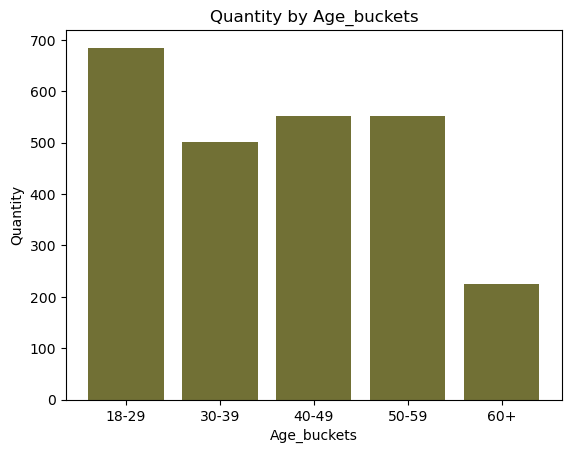

In [14]:
age_groups = quantity_by_age.index
quantity = quantity_by_age['quantity']

# Creat an array of evenly spaced values to represent the positions of the bars on the x-axis
xpos = np.arange(len(age_groups))

# Plot a bar chart
plt.bar(xpos, quantity, color='#717035')

# Setting the parameters i.e. x & y labels, title and xticks
plt.xticks(xpos, age_groups)
plt.xlabel('Age_buckets')
plt.ylabel('Quantity')
plt.title('Quantity by Age_buckets')


plt.show()

Based on the bar chart, it's evident that customers aged 18-29 made the highest number of purchases, totaling 685 products. Following closely are customers aged 50-59, who purchased 552 products. Conversely, customers aged 60 and above had the lowest number of purchases, with only 225 products bought..

In [15]:
# Find the total sales for each age group and store the result in a dataframe
sales_by_age = retail_sales.groupby('age_buckets')[['sales']].sum()

sales_by_age = pd.DataFrame(sales_by_age)

# Create a variable 'total_sales' which is the overall sum of sales 
total_sales = sales_by_age['sales'].sum()

# Create a new column 'sales %'
sales_by_age['sales %'] = sales_by_age['sales']/total_sales*100
sales_by_age


,sales,sales %
age_buckets,,
18-29,132945,29.15
30-39,95950,21.04
40-49,93795,20.57
50-59,100085,21.95
60+,33225,7.29


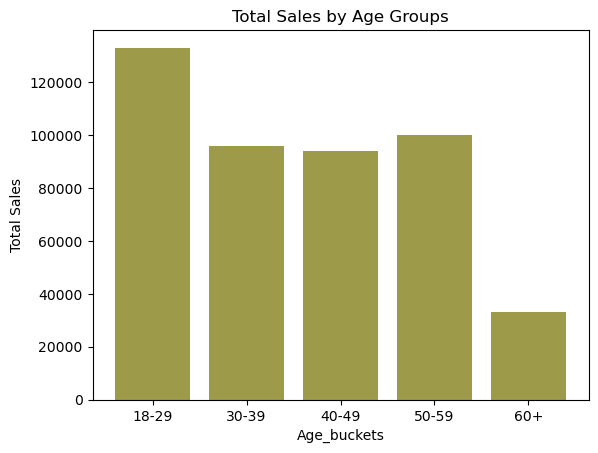

In [17]:
age_buckets = sales_by_age.index
sales = sales_by_age['sales']

# Creat an array of evenly spaced values to represent the positions of the bars on the y-axis.
xpos = np.arange(len(age_buckets))

# Plot a horizontal bar chart
plt.bar(xpos, sales, color='#9D9B4A')

# Setting the parameters
plt.xticks(xpos, age_buckets)
plt.xlabel('Age_buckets')
plt.ylabel('Total Sales')
plt.title('Total Sales by Age Groups')

plt.show()

Similar to quantity, customers within the age bracket of 18-29 contribute the highest percentage of total sales, amounting to 29.15%. This is followed by customers aged between 50-59, 30-39, and 40-49, contributing 21.95%, 21.04% and 20.57% respectively

In [18]:
# Calculate the correlation between the 'age' and 'sales' columns
retail_sales[['age', 'sales']].corr()

,age,sales
age,1.00,-0.06
sales,-0.06,1.00


The correlation coefficient between age and sales is -0.06, which suggests that there is a weak negative linear relationship between age and sales. This means that age alone may not be a strong predictor of sales

In [19]:
# Quantity distribution across different gender
quantity_by_gender = retail_sales.groupby('gender', as_index=False)[['quantity']].sum()
quantity_by_gender

,gender,quantity
0,Female,1298
1,Male,1216


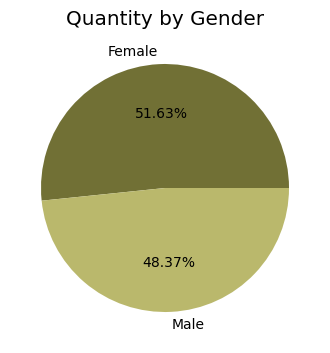

In [59]:
# Set the plot style and figure size
plt.style.use('ggplot')
plt.figure(figsize=(4,6))

# Extract quantity data and gender labels from quantity_by_gender DataFrame
quantity = quantity_by_gender['quantity']
gender_labels = quantity_by_gender['gender']
colors = ['#717035', '#BAB86C']
# Creat a pie chart with quantity as the data and gender as labels
# autopct displays percentage values with 2 decimal places
plt.pie(quantity, labels=gender_labels, colors=colors, autopct='%.2f%%')

# # Add a title to the pie chart
plt.title('Quantity by Gender')

plt.show()

From the pie chart, purchases made by female customers total 1298, representing 51.63% of the total quantity while purchases by male customers amount to 1216, accounting for 48.37% of the total quantity.

In [21]:
# Calculate total sales for Female and Male customers and store the result in a dataframe
sales_by_gender = retail_sales.groupby('gender')[['sales']].sum()
sales_by_gender = pd.DataFrame(sales_by_gender)

# Add a column sales_percentage
sales_by_gender['sales_percentage'] = (sales_by_gender['sales']/sales_by_gender['sales'].sum())*100
sales_by_gender

,sales,sales_percentage
gender,,
Female,232840,51.06
Male,223160,48.94


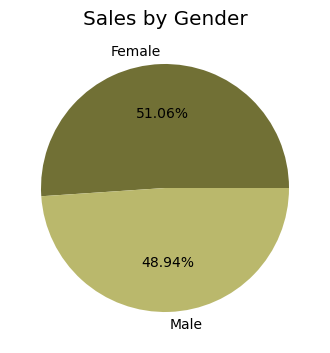

In [61]:
# Set the figure size
plt.figure(figsize=(4,6))

# Extract sales data and gender labels from sales_by_gender DataFrame
sales = sales_by_gender['sales']
gender = sales_by_gender.index
colors = ['#717035', '#BAB86C']

# Create a pie chart with sales as the data and gender as labels.
# autopct method displays percentage values with 2 decimal places
plt.pie(sales, labels=gender, colors=colors, autopct='%.2f%%')

# Add a title to the pie chart
plt.title('Sales by Gender')

plt.show()

Sales from female customers amount to 232,840, which corresponds to 51.06% of the total, while sales from male customers total 223,160, representing 48.94% of the total.

### 2. Sales patterns across different time periods
To analyze sales patterns across different time periods, we wil look at monthly and quarterly sales.

In [23]:
# Monthly sales distribution
monthly_sales = retail_sales['sales'].resample('M').sum()

# Store the result in a dataframe
monthly_sales = pd.DataFrame(monthly_sales)

# Add a new column 'sales %'
total_sales = monthly_sales['sales'].sum()
monthly_sales['sales %'] = monthly_sales['sales']/total_sales*100
monthly_sales

,sales,sales %
Date,,
2023-01-31,35450,7.77
2023-02-28,44060,9.66
2023-03-31,28990,6.36
2023-04-30,33870,7.43
2023-05-31,53150,11.66
2023-06-30,36715,8.05
2023-07-31,35465,7.78
2023-08-31,36960,8.11
2023-09-30,23620,5.18


From the above output, top four months with highest sales include:
 - May accounts for the highest percentage of total sales, contributing 11.66%.
 - October follows closely, contributing 10.21% of total sales
 - December and February contribute 9.80% and 9.66% of total sales, respectively.

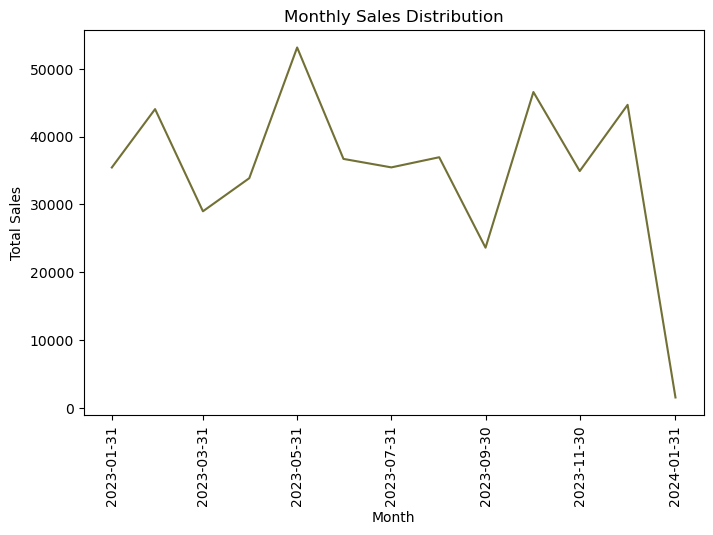

In [33]:
# Set the style to default
plt.style.use('default')

# Specify new figure size to be 8x5 inches.
plt.figure(figsize=(8,5))

# Extract the x-axis and y-axis values from the DataFrame 'monthly_sales
month = monthly_sales.index
sales = monthly_sales['sales']

# Plot the sales data against the month
plt.plot(month, sales, color='#717035')

# Set the title of the plot
plt.title('Monthly Sales Distribution')

# Set the x-axis label and rotate the labels by 90 degrees for better readability.
plt.xlabel('Month')
plt.xticks(rotation=90)

# Set the x-axis ticks to show every other month for better visualization
plt.xticks(monthly_sales.index[::2])

# Set the y-axis label.
plt.ylabel('Total Sales')

# Display the plot.
plt.show()

In [34]:
# Quarterly sales distribution
quarterly_sales = retail_sales['sales'].resample('Q').sum()

# Store the results in a DataFrame
quarterly_sales = pd.DataFrame(quarterly_sales)
quarterly_sales

,sales
Date,
2023-03-31,108500
2023-06-30,123735
2023-09-30,96045
2023-12-31,126190
2024-03-31,1530


#### 3. Sales distribution across differennt product categories

In [35]:
# Calculate the sum of 'sales' for each category
product_sales = retail_sales.groupby('product category', as_index=False)[['sales']].sum()
total_sales = product_sales['sales'].sum()

product_sales['sales %'] = product_sales['sales'] / total_sales*100
product_sales

,product category,sales,sales %
0,Beauty,143515,31.47
1,Clothing,155580,34.12
2,Electronics,156905,34.41


<Axes: xlabel='product category', ylabel='sales'>

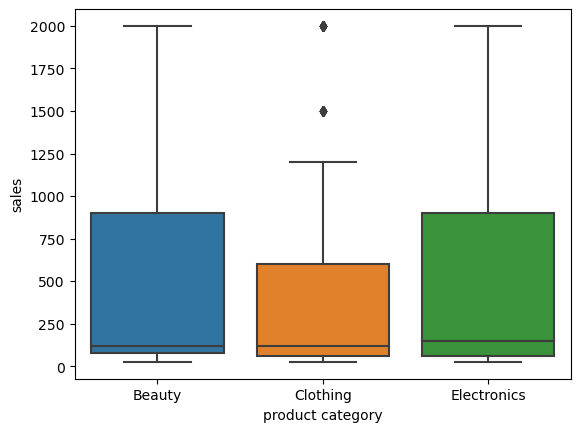

In [38]:
# Create a box plot to visualize the distribution of sales across different product categories.
sns.boxplot(x='product category', y='sales', data=retail_sales)

From the result above, Electronics and Clothing categories have slightly higher contributions compared to the Beauty category. Distribution of sales is as follows:
- Electronics category contributes 34.41% of total sales
- Clothing category which contributes 34.12% 
- Beauty category contributes 31.47%.

In [42]:
# Total quantity for each product category
category_quantity = retail_sales.groupby('product category', as_index=False)[['quantity']].sum()
category_quantity

,product category,quantity
0,Beauty,771
1,Clothing,894
2,Electronics,849


#### 4. Relationships between age, spending habits and product preference


In [47]:
# Return summary statistics for age, quantity and sales columns
retail_sales[['age', 'quantity','sales']].describe()

,age,quantity,sales
count,1000.00,1000.00,1000.00
mean,41.39,2.51,456.00
std,13.68,1.13,560.00
min,18.00,1.00,25.00
25%,29.00,1.00,60.00
50%,42.00,3.00,135.00
75%,53.00,4.00,900.00
max,64.00,4.00,2000.00


In [50]:
# Calculate the correlation matrix between the columns 'age', 'quantity', and 'sales' columns
retail_sales[['age', 'quantity', 'sales']].corr()

,age,quantity,sales
age,1.00,-0.02,-0.06
quantity,-0.02,1.00,0.37
sales,-0.06,0.37,1.00


In [51]:
# Calculate the sum of 'quantity' for each age group and product category
quantity_per_category = retail_sales.groupby(['age_buckets', 'product category'], as_index=False)[['quantity']].sum()

# Calculate the total quantity across all categories
total_quantity = quantity_per_category['quantity'].sum()

# Calculate the percentage of quantity for each category and age group
quantity_per_category['quantity %'] = quantity_per_category['quantity']/total_quantity*100
quantity_per_category

,age_buckets,product category,quantity,quantity %
0,18-29,Beauty,246,9.79
1,18-29,Clothing,224,8.91
2,18-29,Electronics,215,8.55
3,30-39,Beauty,149,5.93
4,30-39,Clothing,179,7.12
5,30-39,Electronics,173,6.88
6,40-49,Beauty,167,6.64
7,40-49,Clothing,207,8.23
8,40-49,Electronics,177,7.04
9,50-59,Beauty,154,6.13


In all product categories, customers aged 18-29 exhibit the highest percentage of quantity:
 - In Beauty, they account for 9.79% of the total quantity.
 - In Clothing, their share is 8.91% of the total quantity.
 - In Electronics, they contribute 8.55% of the total quantity

In [52]:
# Calculate total sales for each age group and product category
sales_per_category = retail_sales.groupby(['age_buckets', 'product category'], as_index=False)[['sales']].sum()

# Calculate total sales across all product categories
total_sales = sales_per_category['sales'].sum()

# Calculate the percentage of sales for each category and age group
sales_per_category['sales %'] = sales_per_category['sales'] / total_sales*100
sales_per_category

,age_buckets,product category,sales,sales %
0,18-29,Beauty,45710,10.02
1,18-29,Clothing,48670,10.67
2,18-29,Electronics,38565,8.46
3,30-39,Beauty,32825,7.20
4,30-39,Clothing,31250,6.85
5,30-39,Electronics,31875,6.99
6,40-49,Beauty,33095,7.26
7,40-49,Clothing,29540,6.48
8,40-49,Electronics,31160,6.83
9,50-59,Beauty,26835,5.88


Similar to quantity, customers aged 18-29 also hold the highest contribution to sales across all product categories:
 - In Clothing, they account for 10.67% of the total sales.
 - In Beauty, their contribution stands at 10.02% of the total sales.
 - In Electronics, they contribute 8.46% of the total sales

#### 5. Distribution of product prices within each category

<Axes: xlabel='product category', ylabel='price per unit'>

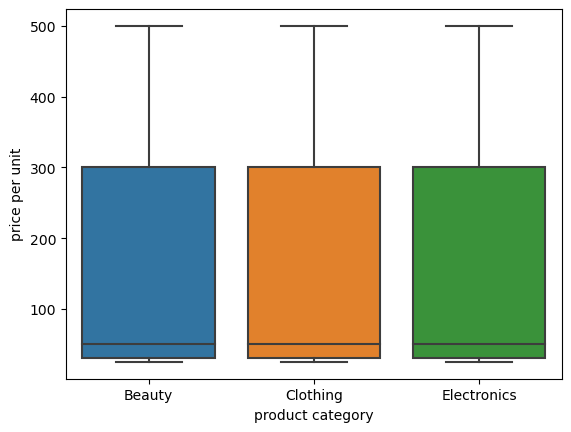

In [56]:
# Plot a boxplot to visualize the distribution of prices within each product category
sns.boxplot(x='product category', y='price per unit', data=retail_sales)

In [57]:
# Calculate the average 'price per unit' for each product category
avg_unit_price = retail_sales.groupby('product category', as_index=False)[['price per unit']].mean()
avg_unit_price

,product category,price per unit
0,Beauty,184.06
1,Clothing,174.29
2,Electronics,181.90


The above result provides insights into the average pricing trend across different product categories within the retail sales data.
 - The average price per unit for products in the Beauty category is 184.06.
 - Products categorized under Clothing have an average price per unit of 174.29.
 - The average price per unit for Electronics is 181.90